In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
hiv = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report.csv")

In [3]:
hiv["Year"] = pd.to_datetime(hiv["Year"])


In [4]:
X = hiv.drop(columns = ["% linked to care within 3 months","Year","Borough","UHF","Gender","Age","Race"])
X.head()

,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,3379,48.3,640,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2595,79.1,480,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,733,21.1,153,622,17.6,0.6,68,605,14.0,6.0,8.0
3,51,99999.0,7,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,47,13.6,4,22,6.4,0.1,57,1,1.4,1.4,0.0


In [5]:
y = hiv["% linked to care within 3 months"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
k3nn = KNeighborsClassifier(n_neighbors = 3)
k3nn.fit(X_train, y_train)
y_pred = k3nn.predict(X_test)
y_pred

array([99999,    75,    75, ...,    75,    62,    33])

In [8]:
((y_test - y_pred)**2).mean()

315917656.9009159

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_hiv = scaler.fit_transform(X_train)
X_test_hiv = scaler.fit_transform(X_test)

In [13]:
knn_mses = []
for k in range(1,21):
    knn_scaled = KNeighborsRegressor(n_neighbors = k)
    knn_scaled.fit(X_train_hiv, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_hiv)
    mse = ((y_test - y_pred_scaled)**2).mean()
    knn_mses.append(mse)

Text(0, 0.5, 'Mean Squared Error')

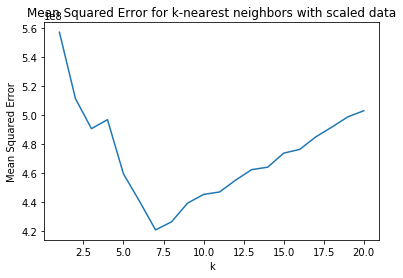

In [14]:
plt.plot(range(1,21),knn_mses)
plt.title("Mean Squared Error for k-nearest neighbors with scaled data")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")